# Continuous Control
---

In [ ]:
%load_ext autoreload
%autoreload 2

from unityagents import UnityEnvironment
import numpy as np
from agent.agent import Agent
import torch

from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
env = UnityEnvironment(file_name='Reacher_Windows_x86_64/Reacher')

In [ ]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

In [ ]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

In [ ]:
agent = Agent(state_size, action_size, seed=42)

In [3]:
from agent.agent import OUNoise

In [14]:
noise = OUNoise(1,42)

In [15]:
noise.reset()
y = []
x = [i for i in range(10000)]
actions = []
actions_noise = []
for i in x:
    noise_s = noise.sample()[0]
    y.append(noise_s)
    action = np.random.randn(1, 1)
    action = np.clip(action,-1,1)[0][0]
    actions.append(action)
    actions_noise.append(np.clip(action+noise_s,-1,1))


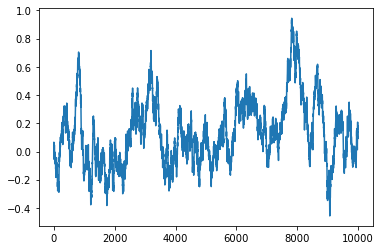

In [16]:
plt.plot(x,y)

In [ ]:
env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)
while True:
    actions = np.random.randn(num_agents, action_size)
    actions = np.clip(actions, -1,1)
    env_info = env.step(actions)[brain_name]
    next_states = env_info.vector_observations 
    rewards = env_info.rewards
    if rewards[0]>0:
        print(rewards)
    dones = env_info.local_done
    scores += env_info.rewards
    states = next_states
    if np.any(dones):
        break   

In [ ]:
scores

In [ ]:
def ddpg(n_episodes=100, max_t=700):  
    scores_deque = deque(maxlen=100)
    scores = [] # initialize the score (for each agent)
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]     # reset the environment  
        state = env_info.vector_observations[0]   # get the current state (for each agent)
        agent.reset()
        score = 0
        while True:
            action = agent.act(state)
            env_info = env.step(action)[brain_name]           # send all actions to tne environment
            next_state = env_info.vector_observations[0]
            reward = env_info.rewards[0]                         # get reward (for each agent)
            done = env_info.local_done[0]                        # see if episode finished
            if reward>0:
                reward = 0.1
            agent.step(state, action, reward, next_state, done)
            
            state = next_state
            score += reward
            if done:
                break 
        scores_deque.append(score)
        scores.append(score)
        print('\rEpisode {}\tAverage Score: {:.2f}\tScore: {:.2f}'.format(i_episode, np.mean(scores_deque), score), end="")
        if i_episode % 10 == 0:
            torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
            torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)))   
    return scores

scores = ddpg()

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores_list)+1), score_list)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

In [ ]:
env.close()

In [ ]:
scores